In [45]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensorflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='Blues', font='Arial', rc={'figure.figsize': (10, 8)})

In [46]:
df=pd.read_csv('./Netflix subscription fee Dec-2021.csv')


In [47]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [48]:
df.shape

(65, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [50]:
df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.00,65.00,65.00,65.00,65.00,65.00
mean,5314.42,3518.95,1795.46,8.37,11.99,15.61
std,980.32,723.01,327.28,1.94,2.86,4.04
min,2274.00,1675.00,373.00,1.97,3.00,4.02
25%,4948.00,3154.00,1628.00,7.99,10.71,13.54
50%,5195.00,3512.00,1841.00,8.99,11.49,14.45
75%,5952.00,3832.00,1980.00,9.03,13.54,18.06
max,7325.00,5234.00,2387.00,12.88,20.46,26.96


In [51]:
df.corr()


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.00,0.97,0.85,-0.06,-0.06,-0.07
No. of TV Shows,0.97,1.00,0.70,-0.00,0.00,-0.01
No. of Movies,0.85,0.70,1.00,-0.18,-0.17,-0.19
Cost Per Month - Basic ($),-0.06,-0.00,-0.18,1.00,0.90,0.82
Cost Per Month - Standard ($),-0.06,0.00,-0.17,0.90,1.00,0.98
Cost Per Month - Premium ($),-0.07,-0.01,-0.19,0.82,0.98,1.00


In [52]:
df.corr()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.00,0.97,0.85,-0.06,-0.06,-0.07
No. of TV Shows,0.97,1.00,0.70,-0.00,0.00,-0.01
No. of Movies,0.85,0.70,1.00,-0.18,-0.17,-0.19
Cost Per Month - Basic ($),-0.06,-0.00,-0.18,1.00,0.90,0.82
Cost Per Month - Standard ($),-0.06,0.00,-0.17,0.90,1.00,0.98
Cost Per Month - Premium ($),-0.07,-0.01,-0.19,0.82,0.98,1.00


In [53]:
df.dtypes

Country_code                      object
Country                           object
Total Library Size                 int64
No. of TV Shows                    int64
No. of Movies                      int64
Cost Per Month - Basic ($)       float64
Cost Per Month - Standard ($)    float64
Cost Per Month - Premium ($)     float64
dtype: object

In [54]:
ProfileReport(df,title='Netflix Price in Different Countries')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


<AxesSubplot:>

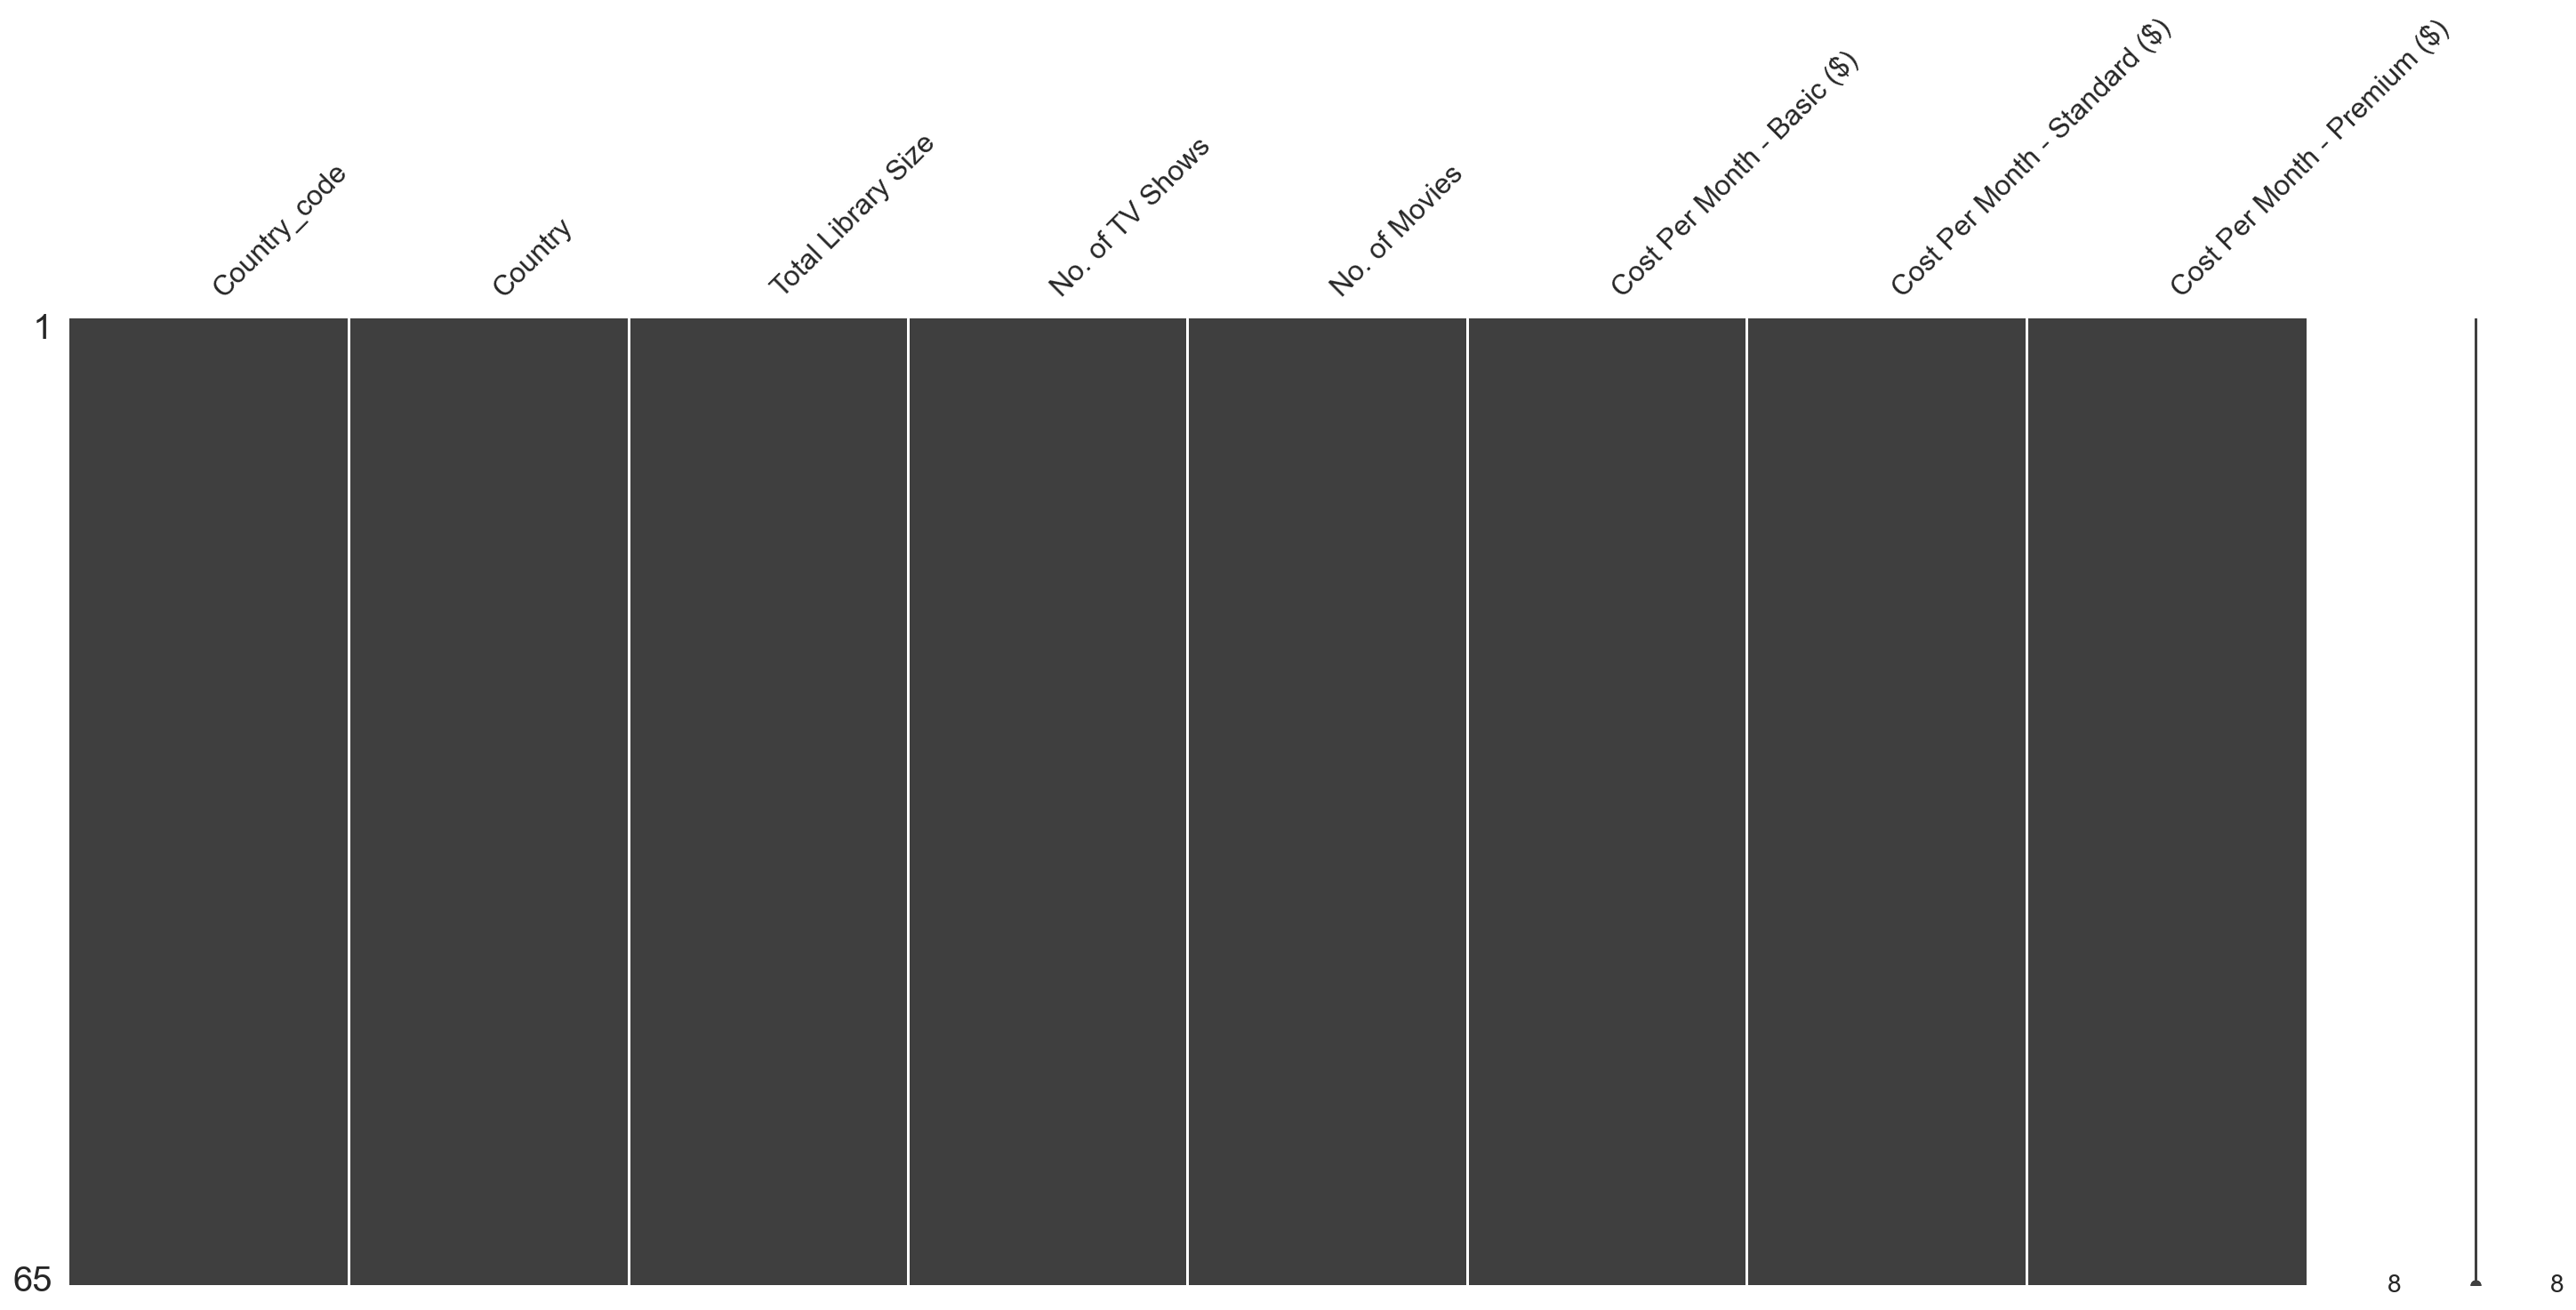

In [55]:
msno.matrix(df)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

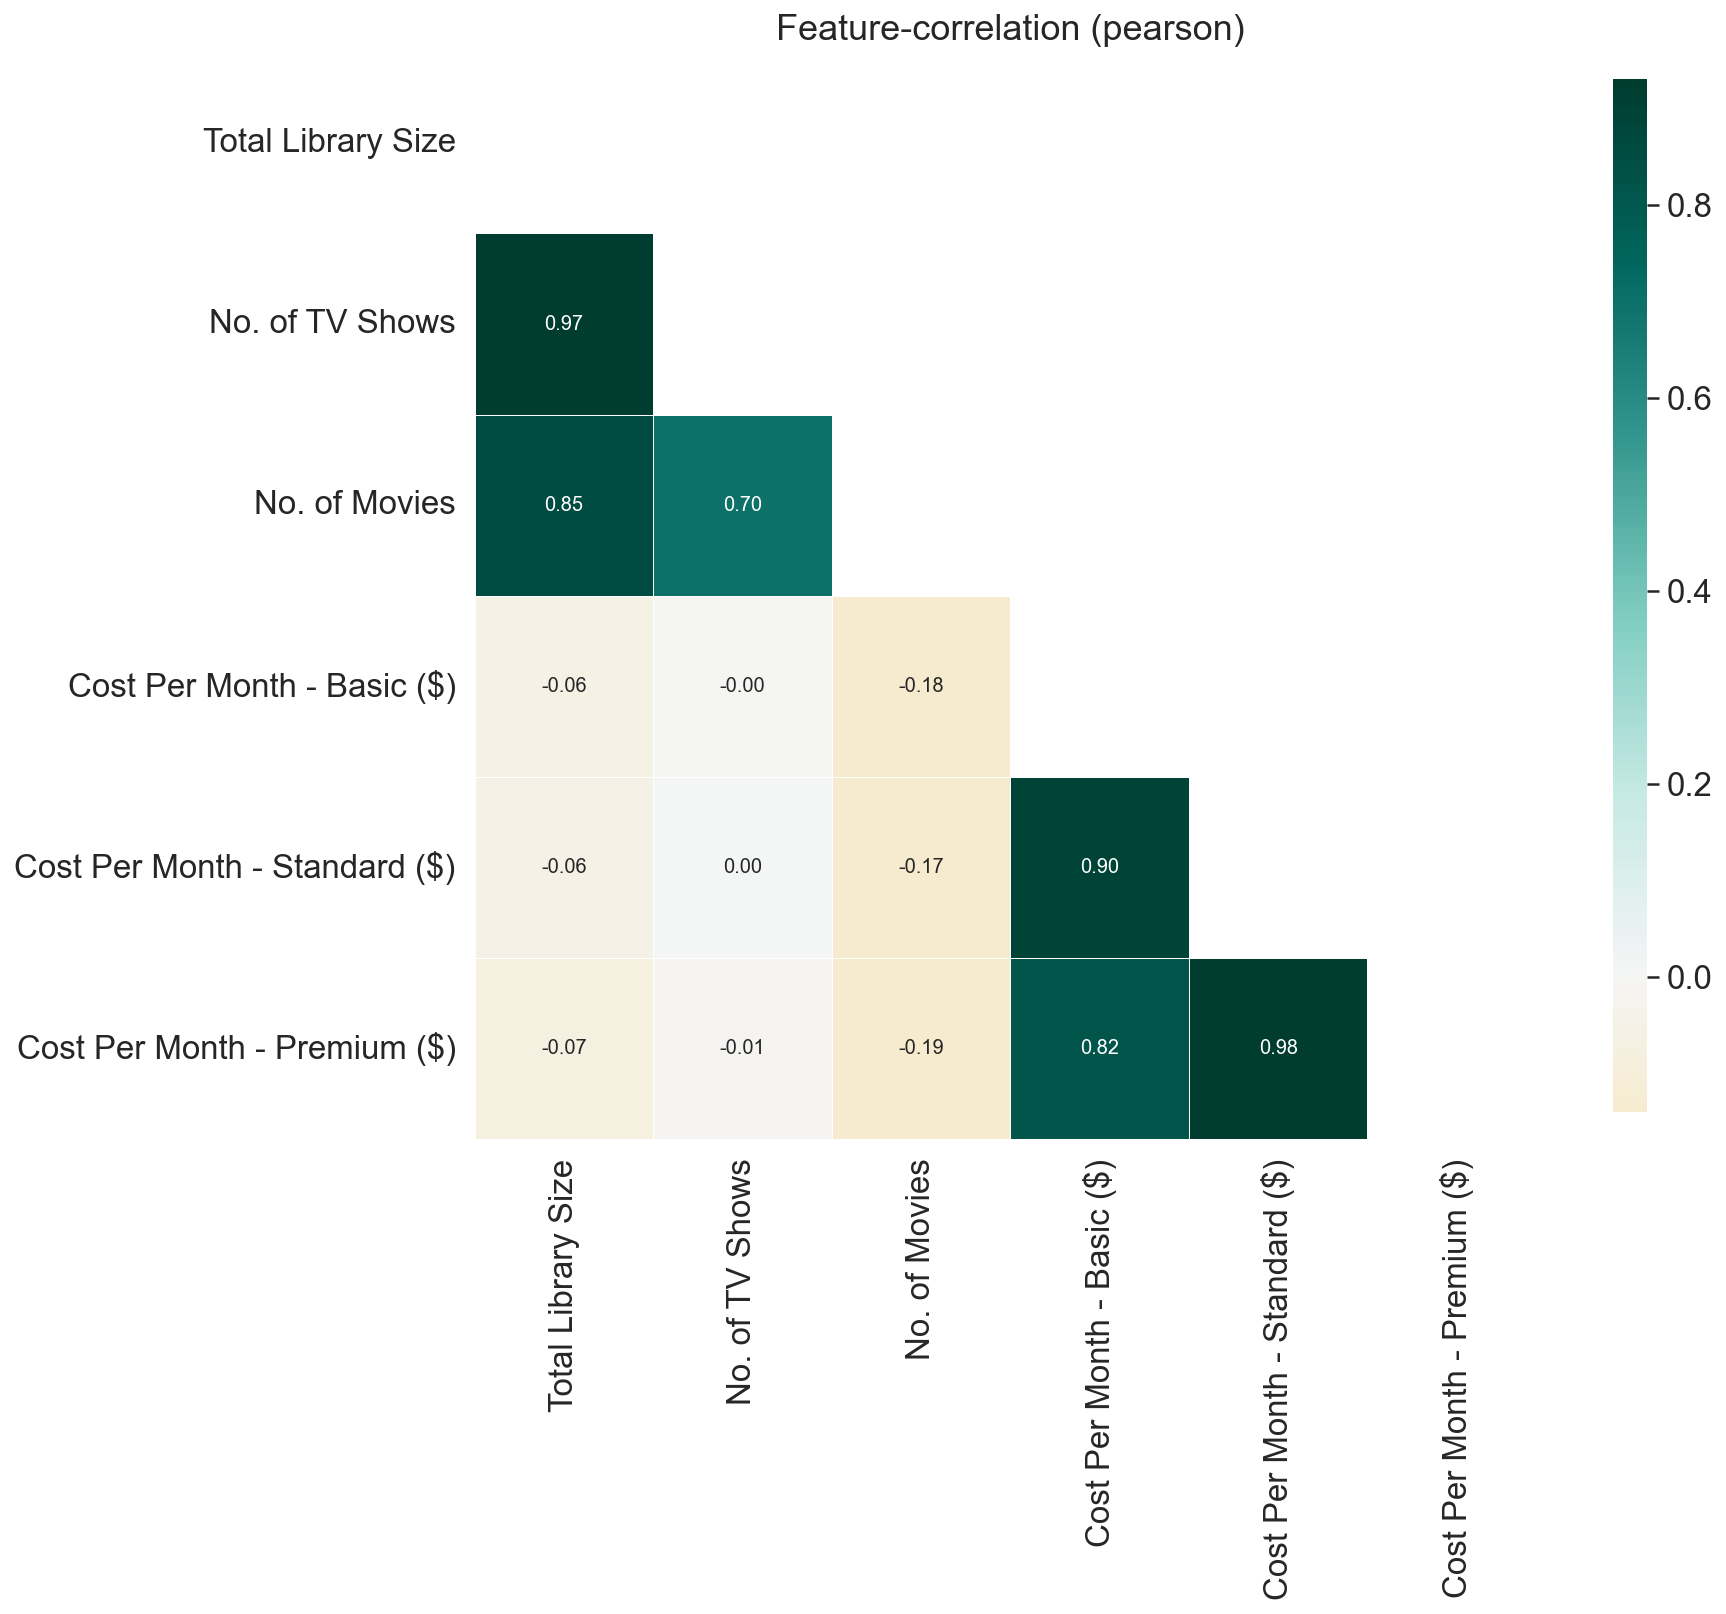

In [56]:
# posivitve correlation matrix
klib.corr_plot(df)

In [57]:
#rename attribute columns of dataset
df = df.rename(columns = {'Country_code' : 'Country_Code', 'Total Library Size' : 'Library_Size', 
                         'No. of TV Shows' : 'No_TV_Shows', 'No. of Movies' : 'No_Movies', 
                         'Cost Per Month - Basic ($)' : 'Basic_Cost_Per_Month', 
                         'Cost Per Month - Standard ($)' : 'Standard_Cost_Per_Month', 
                         'Cost Per Month - Premium ($)' : 'Premium_Cost_Per_Month'})
df.head()

,Country_Code,Country,Library_Size,No_TV_Shows,No_Movies,Basic_Cost_Per_Month,Standard_Cost_Per_Month,Premium_Cost_Per_Month
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


<AxesSubplot:>

Text(0.5, 1.0, 'Pearson Correlation')

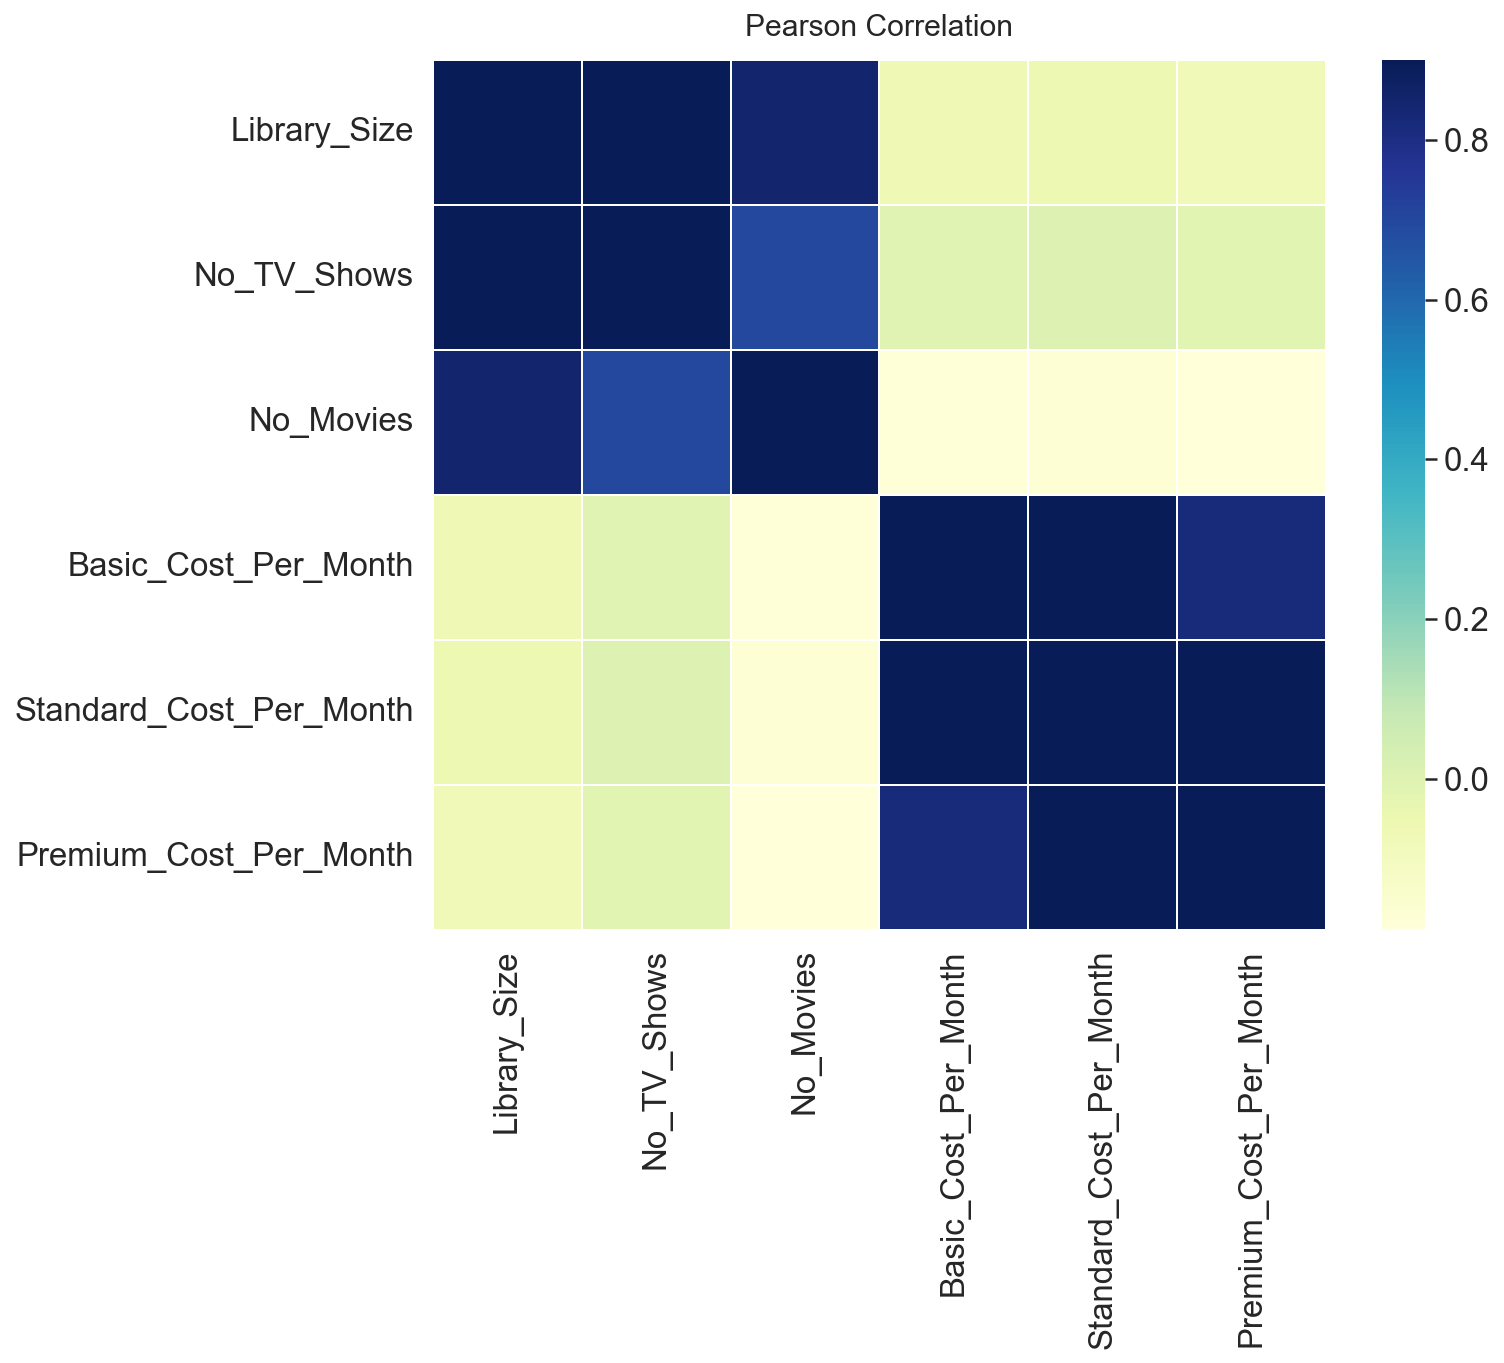

In [58]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df.corr(), vmax = 0.9, linewidths = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

In [59]:
#check unique of country code column
df['Country_Code'].unique()

array(['ar', 'au', 'at', 'be', 'bo', 'br', 'bg', 'ca', 'cl', 'co', 'cr',
       'hr', 'cz', 'dk', 'ec', 'ee', 'fi', 'fr', 'de', 'gi', 'gr', 'gt',
       'hn', 'hk', 'hu', 'is', 'in', 'id', 'ie', 'il', 'it', 'jp', 'lv',
       'li', 'lt', 'my', 'mx', 'md', 'mc', 'nl', 'nz', 'no', 'py', 'pe',
       'ph', 'pl', 'pt', 'ro', 'ru', 'sm', 'sg', 'sk', 'za', 'kr', 'es',
       'se', 'ch', 'tw', 'th', 'tr', 'ua', 'gb', 'us', 'uy', 've'],
      dtype=object)

In [60]:
#check unique of country column
df['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova',
       'Monaco', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'San Marino', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Venezuela'], dtype=object)

In [66]:
india = df[df['Country'] == 'India']
india

,Country_Code,Country,Library_Size,No_TV_Shows,No_Movies,Basic_Cost_Per_Month,Standard_Cost_Per_Month,Premium_Cost_Per_Month
26,in,India,5843,3718,2125,2.64,6.61,8.60


In [67]:
df.head()

,Country_Code,Country,Library_Size,No_TV_Shows,No_Movies,Basic_Cost_Per_Month,Standard_Cost_Per_Month,Premium_Cost_Per_Month
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [74]:
#visualize top 20 of country based on total basic cost per month
plt.figure(figsize=(10,10))

df.groupby('Country')['Basic_Cost_Per_Month'].sum()

<Figure size 720x720 with 0 Axes>

Country
Argentina         3.74
Australia         7.84
Austria           9.03
Belgium          10.16
Bolivia           7.99
                  ... 
Ukraine           5.64
United Kingdom    7.91
United States     8.99
Uruguay           8.99
Venezuela         7.99
Name: Basic_Cost_Per_Month, Length: 65, dtype: float64

<Figure size 720x720 with 0 Axes>

In [76]:
temp = df.groupby('Country')['Basic_Cost_Per_Month'].sum().sort_values(ascending=False).head(20)

<AxesSubplot:xlabel='Basic_Cost_Per_Month', ylabel='Country'>

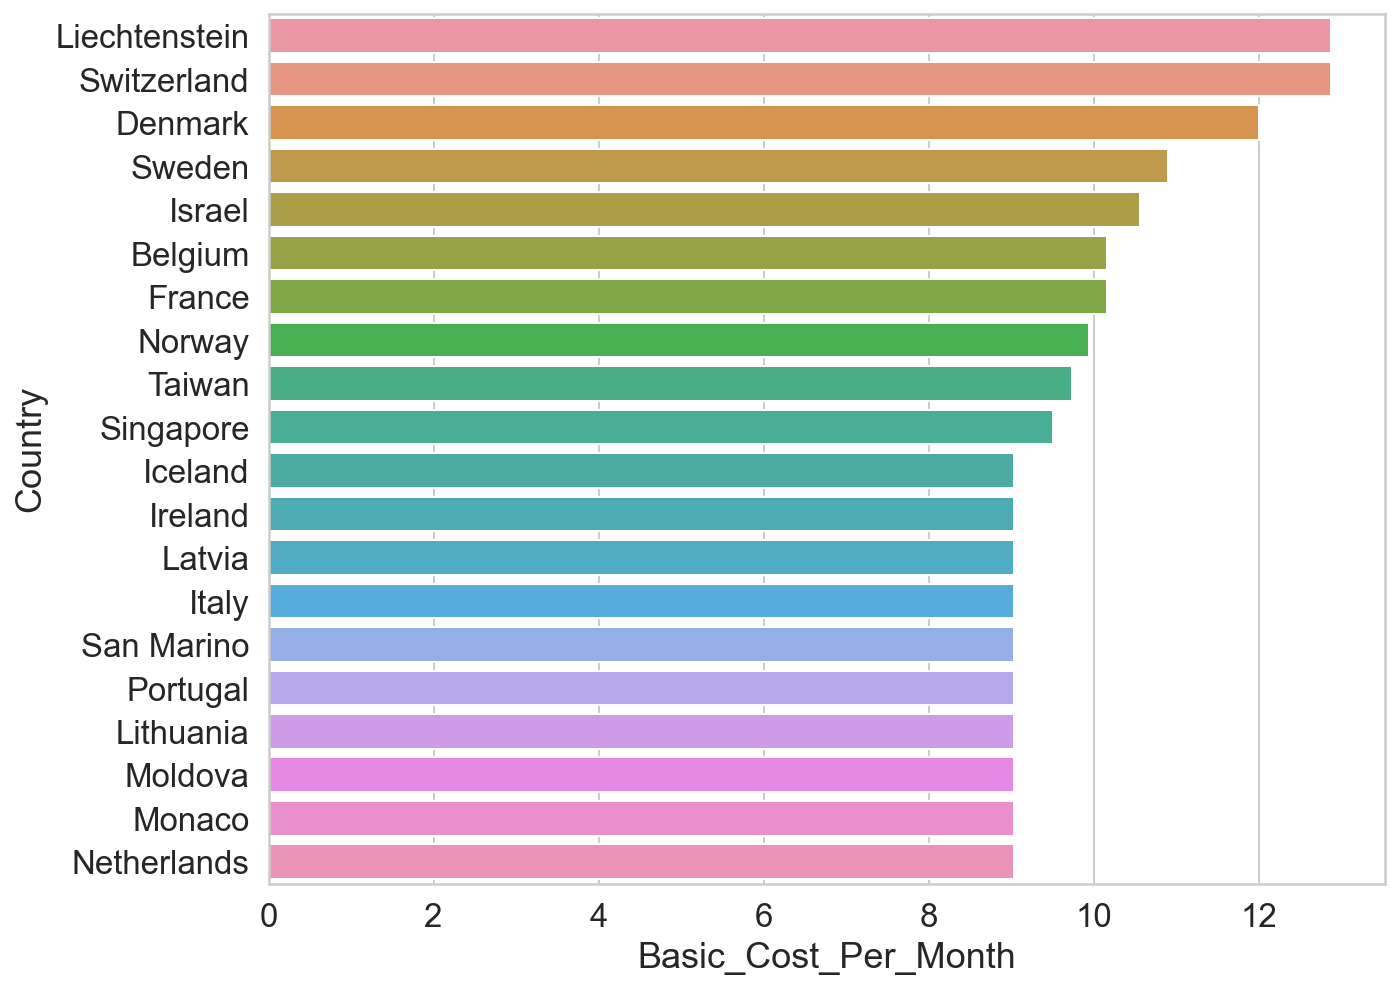

In [79]:
sns.barplot(y=temp.index, x=temp)

In [82]:
#visualize top 20 of country based on total standard cost per month
plt.figure(figsize=(10,10))
temp=df.groupby('Country')['Standard_Cost_Per_Month'].sum().sort_values(ascending=False).head(20)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Standard_Cost_Per_Month', ylabel='Country'>

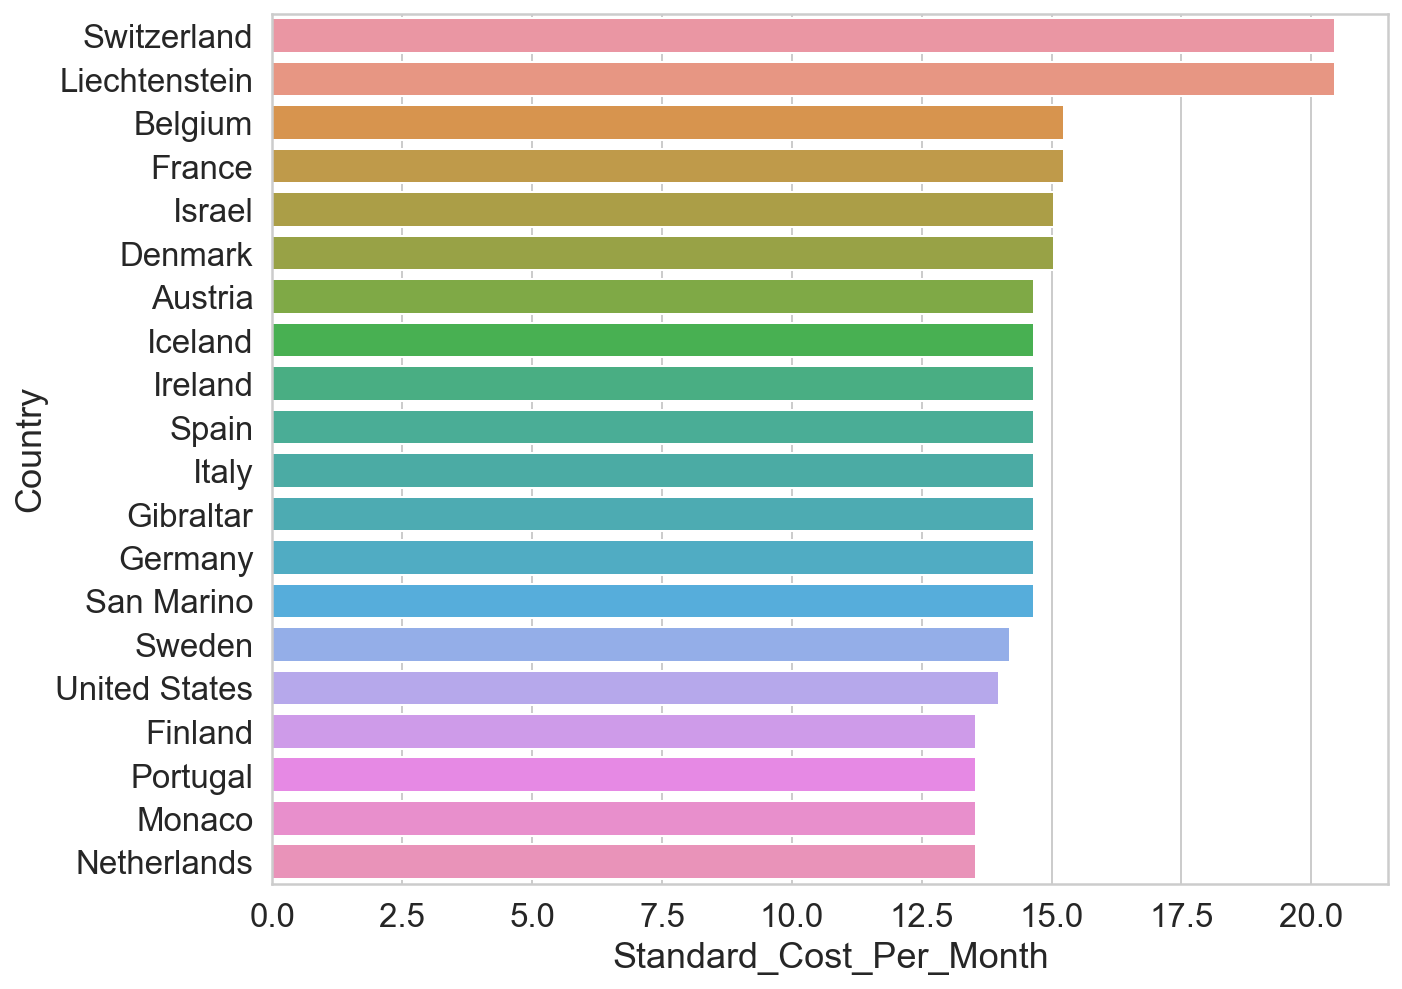

In [83]:
sns.barplot(y=temp.index, x=temp)

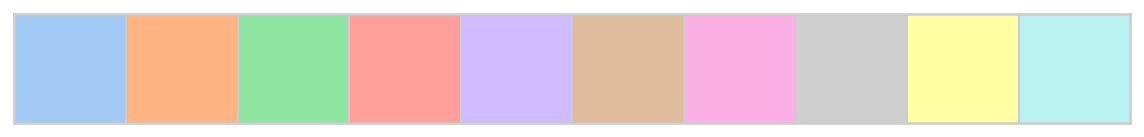

In [85]:
sns.set_color_codes("pastel")
# show palette pastel
sns.palplot(sns.color_palette("pastel"))

<Figure size 1440x5904 with 0 Axes>

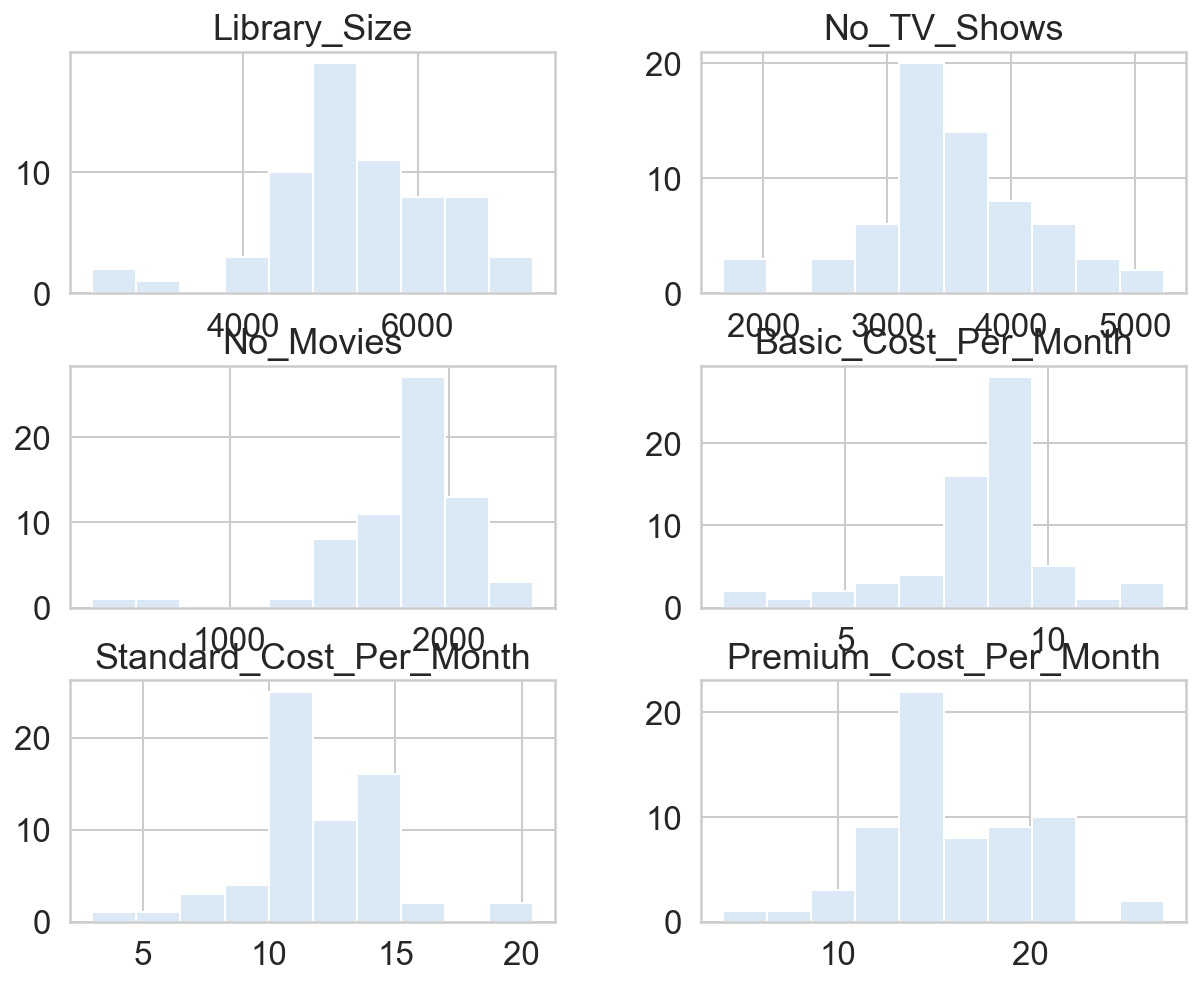

In [92]:
plt.figure(figsize=(20,82))
df.hist();
